In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import pathlib
import IPython.display as display
tf.__version__

'2.0.0-alpha0'

In [2]:
img_size = 55

cell_labels = []

cell_images = []

infected = []
uninfected = []

In [3]:
base_path = "C:\\Users\\Jessy\\Downloads\\cell-images-for-detecting-malaria\\cell_images\\"
#infected_path = base_path + "Parasitized\\"
#uninfected_path = base_path + "Uninfected\\"

data_root_infected = pathlib.Path(base_path + "Parasitized\\")
data_root_uninfected = pathlib.Path(base_path + "Uninfected\\")
#data_root_infected = pathlib.Path(infected_path)
#data_root_uninfected = pathlib.Path(uninfected_path)

all_infected_paths = list(data_root_infected.glob('*.png'))
all_infected_paths = [str(path) for path in all_infected_paths]

all_uninfected_paths = list(data_root_uninfected.glob('*.png'))
all_uninfected_paths = [str(path) for path in all_uninfected_paths]
#random.shuffle(all_image_paths)

In [4]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [55, 55])
    image /= 255.0  # normalize to [0,1] range
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

In [5]:
for item in all_infected_paths:
    final_image = load_and_preprocess_image(item)
    infected.append(final_image)
    cell_images.append(final_image)
    cell_labels.append(1)
    
for item in all_uninfected_paths:
    final_image = load_and_preprocess_image(item)
    uninfected.append(final_image)
    cell_images.append(final_image)
    cell_labels.append(0)

In [9]:
print("cell_labels_length: ", len(cell_labels))
print("cell_images_length: ", len(cell_images))
print("infected_images_length: ", len(infected))
print("uninfected_images_length: ", len(uninfected))

cell_labels_length:  27558
cell_images_length:  27558
infected_images_length:  13779
uninfected_images_length:  13779


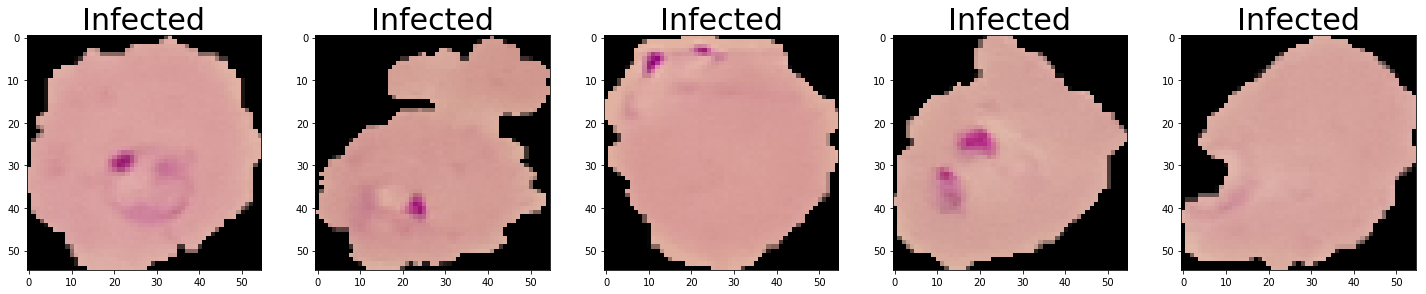

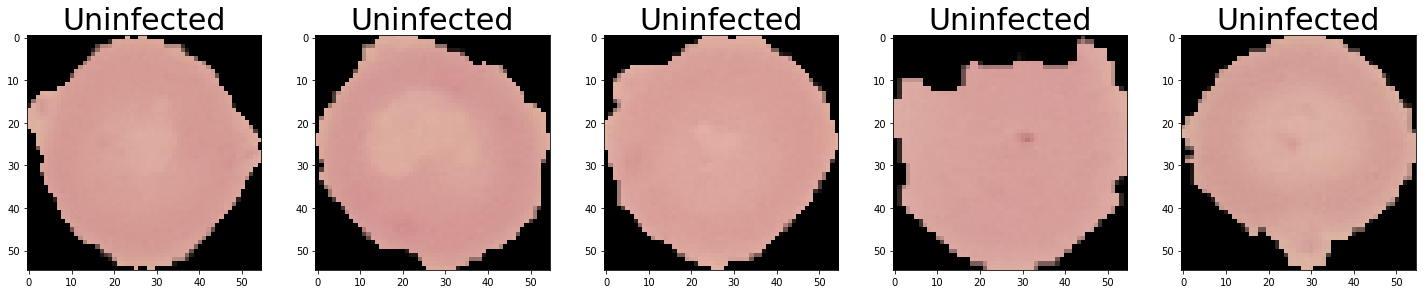

In [28]:
def visualize_images(imgs, title):    
    plt.figure(figsize=(25,25))
    for i in range(5):
        plt.subplot(5,5, i+1)
        plt.grid(False)
        plt.imshow(imgs[i])
        plt.title(title,fontsize=30)
    plt.show()
    
visualize_images(infected, "Infected")
visualize_images(uninfected, "Uninfected")